In [7]:
import kagglehub
path = kagglehub.dataset_download("drgfreeman/rockpaperscissors")

print("Path to dataset files:", r'C:\Users\leona\Desktop\01 - Projeto Python\ML_category\datasets')

Path to dataset files: C:\Users\leona\Desktop\01 - Projeto Python\ML_category\datasets


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


train_dir = r"C:\Users\leona\Desktop\01 - Projeto Python\ML_category\datasets\train"
test_dir = r"C:\Users\leona\Desktop\01 - Projeto Python\ML_category\datasets\test"

img_size = (150, 150)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size
)

Found 2188 files belonging to 3 classes.
Found 2188 files belonging to 3 classes.


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes
])

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - accuracy: 0.7655 - loss: 0.5484 - val_accuracy: 0.3597 - val_loss: 2.2914
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.9438 - loss: 0.1685 - val_accuracy: 0.3505 - val_loss: 3.4280
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - accuracy: 0.9685 - loss: 0.0905 - val_accuracy: 0.3478 - val_loss: 4.1739
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - accuracy: 0.9781 - loss: 0.0601 - val_accuracy: 0.3469 - val_loss: 5.1269
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - accuracy: 0.9890 - loss: 0.0299 - val_accuracy: 0.3437 - val_loss: 6.2062
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - accuracy: 0.9963 - loss: 0.0118 - val_accuracy: 0.3432 - val_loss: 7.6651
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.3428 - val_loss: 9.7807
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 210ms/step - accuracy: 0.9986 - loss: 0.0033 - val_accu

In [12]:
model.evaluate(test_ds)

69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.3428 - loss: 11.9121


[11.912069320678711, 0.3427788019180298]

In [13]:
import numpy as np

for images, labels in test_ds.take(1):
    preds = model.predict(images)
    print("Predições:", np.argmax(preds, axis=1))
    print("Rótulos verdadeiros:", labels.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predições: [1 2 0 0 2 1 1 1 1 0 0 0 2 1 1 1 0 1 1 0 1 0 2 2 2 2 1 1 1 2 0 1]
Rótulos verdadeiros: [0 2 1 1 2 0 0 0 0 1 1 1 2 0 0 0 1 0 0 1 0 1 2 2 2 2 0 0 0 2 1 0]


In [14]:
img_size = (150, 150)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes:", class_names)

Found 2188 files belonging to 3 classes.
Found 2188 files belonging to 3 classes.
Classes: ['01- rock', '02 - paper', '03 - scissors']


In [15]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

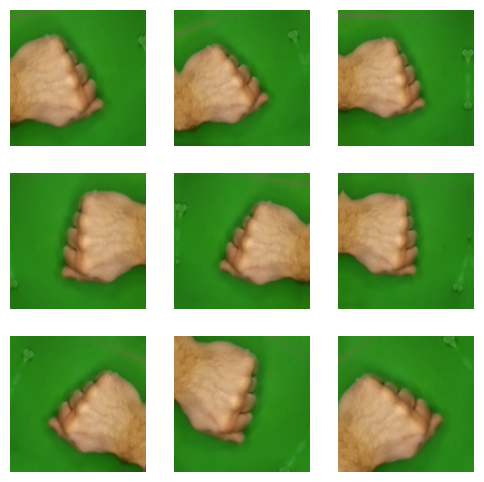

In [16]:
for image, _ in train_ds.take(1):
    plt.figure(figsize=(6,6))
    for i in range(9):
        augmented = data_augmentation(image)[0].numpy().astype("uint8")
        plt.subplot(3,3,i+1)
        plt.imshow(augmented)
        plt.axis("off")
    plt.show()
    break

In [17]:
cnn_model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [18]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
history_cnn = cnn_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - accuracy: 0.5005 - loss: 1.0360 - val_accuracy: 0.3396 - val_loss: 1.2827
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 217ms/step - accuracy: 0.8112 - loss: 0.5090 - val_accuracy: 0.3711 - val_loss: 1.8822
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 230ms/step - accuracy: 0.8894 - loss: 0.3308 - val_accuracy: 0.3684 - val_loss: 2.0982
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 223ms/step - accuracy: 0.9040 - loss: 0.2669 - val_accuracy: 0.3606 - val_loss: 2.3897
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 222ms/step - accuracy: 0.9086 - loss: 0.2347 - val_accuracy: 0.3601 - val_loss: 3.1143
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.9369 - loss: 0.1834 - val_accuracy: 0.3537 - val_loss: 3.8831
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.9442 - loss: 0.1490 - val_accuracy: 0.4063 - val_loss: 3.4627
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 219ms/step - accuracy: 0.9438 - loss: 0.1629 - val_accu

In [20]:
cnn_model.evaluate(test_ds)

69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.3533 - loss: 5.0908


[5.090844631195068, 0.3532906770706177]

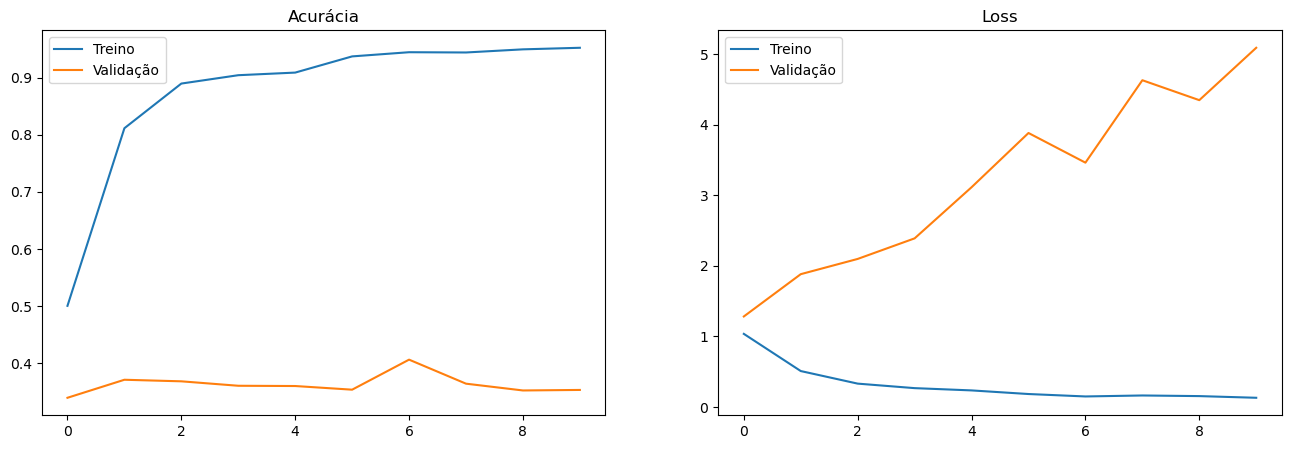

In [21]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(16,5))
    
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, label="Treino")
    plt.plot(epochs, val_acc, label="Validação")
    plt.title("Acurácia")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, label="Treino")
    plt.plot(epochs, val_loss, label="Validação")
    plt.title("Loss")
    plt.legend()

    plt.show()

plot_history(history_cnn)

In [22]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(150,150,3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # congela a base

C:\Users\leona\AppData\Local\Temp\ipykernel_28192\2946448.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [23]:
tl_model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

tl_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
history_tl = tl_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 238ms/step - accuracy: 0.9337 - loss: 0.1819 - val_accuracy: 0.3451 - val_loss: 5.6988
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 217ms/step - accuracy: 0.9799 - loss: 0.0630 - val_accuracy: 0.3396 - val_loss: 6.5747
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 217ms/step - accuracy: 0.9863 - loss: 0.0422 - val_accuracy: 0.3451 - val_loss: 6.9586
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 223ms/step - accuracy: 0.9881 - loss: 0.0318 - val_accuracy: 0.3446 - val_loss: 7.2327
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step - accuracy: 0.9927 - loss: 0.0226 - val_accuracy: 0.3437 - val_loss: 7.7253
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 217ms/step - accuracy: 0.9950 - loss: 0.0197 - val_accuracy: 0.3432 - val_loss: 8.0097
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step - accuracy: 0.9913 - loss: 0.0279 - val_accuracy: 0.3437 - val_loss: 8.9214
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 223ms/step - accuracy: 0.9968 - loss: 0.0117 - val_accu

In [25]:
tl_model.evaluate(test_ds)

69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.3423 - loss: 10.0615


[10.061492919921875, 0.3423217535018921]

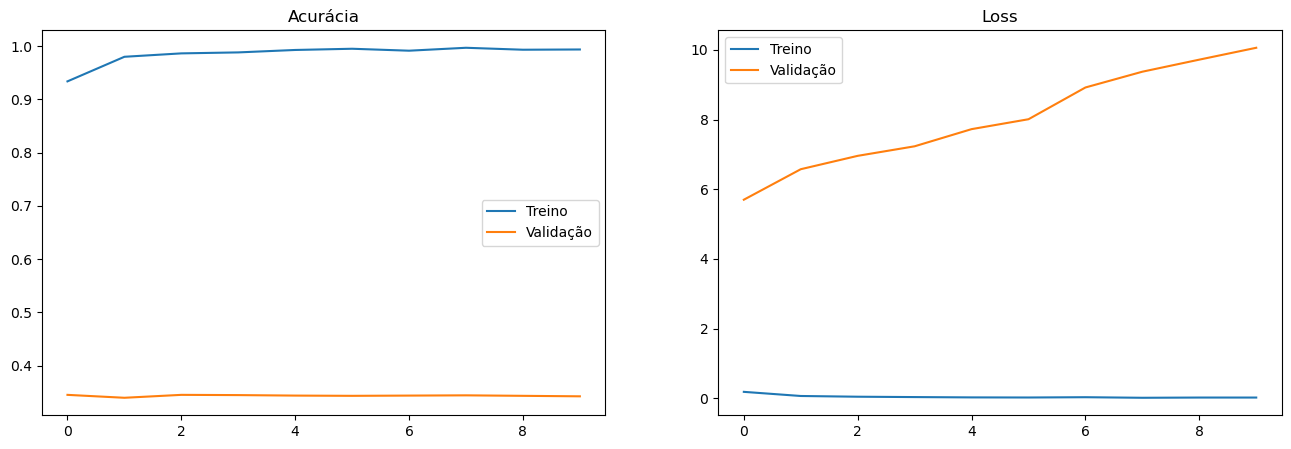

In [26]:
plot_history(history_tl)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step
Predições: [1 2 2 2 2 1 1 2 2 2 0 0 2 2 0 0 2 1 1 2 1 1 1 0 2 1 2 1 2 2 0 2]
Verdadeiros: [0 2 2 2 2 0 0 2 2 2 1 1 2 2 1 1 2 0 0 2 0 0 0 1 2 0 2 0 2 2 1 2]


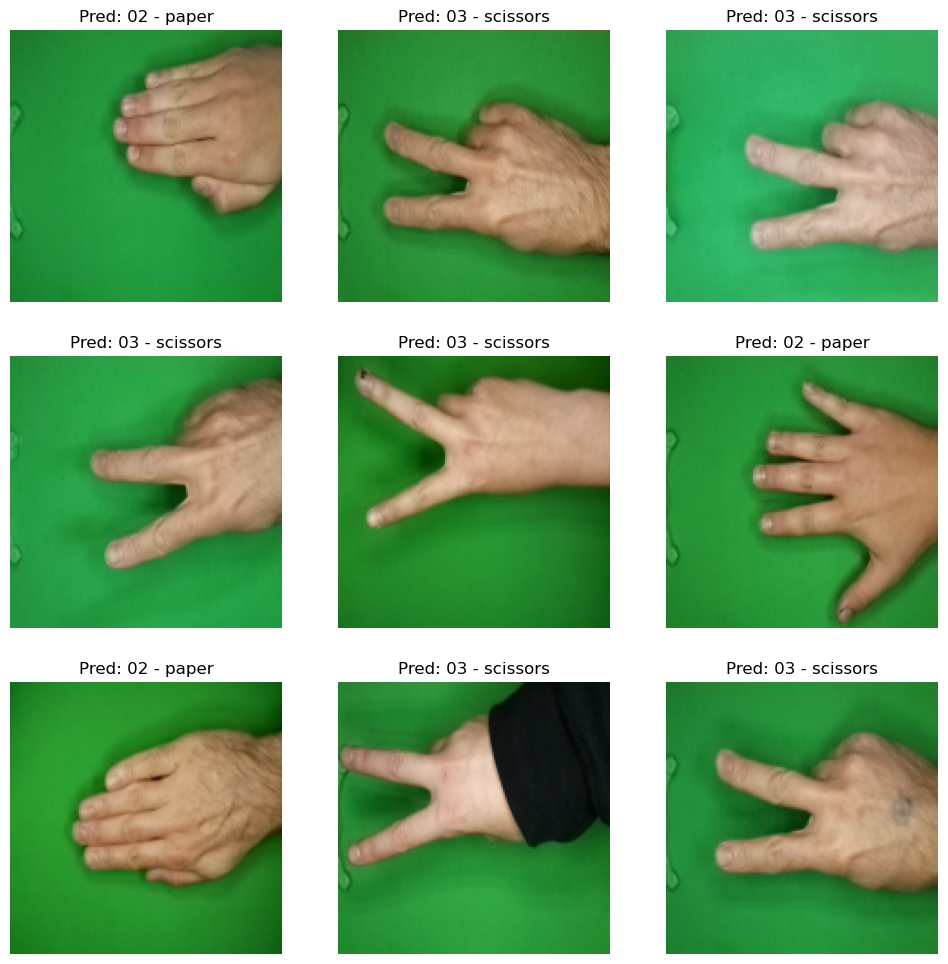

In [27]:
for images, labels in test_ds.take(1):
    preds = tl_model.predict(images)
    pred_classes = np.argmax(preds, axis=1)

    print("Predições:", pred_classes)
    print("Verdadeiros:", labels.numpy())

    plt.figure(figsize=(12,12))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {class_names[pred_classes[i]]}")
        plt.axis("off")
    plt.show()

In [28]:
tl_model.save("rock_paper_scissors_model.keras")
print("Modelo salvo!")

Modelo salvo!


In [29]:
loaded_model = tf.keras.models.load_model("rock_paper_scissors_model.keras")
loaded_model.evaluate(test_ds)

69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.3423 - loss: 10.0615


[10.061493873596191, 0.3423217535018921]